# Análise de Otimização de Custos de Plano de Saúde

Neste notebook, realizamos uma análise detalhada dos fatores que estão relacionados com o custo do plano de saúde na empresa do ramo alimentício. Utilizamos uma abordagem exploratória e uma regressão linear múltipla para entender esses fatores e fornecer insights para a otimização dos custos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Carregar os dados
url = "/content/base_plano_de_saude.CSV"
dados = pd.read_csv(url, sep=';')

# Visualizar as primeiras linhas do DataFrame
dados.head()

,Idade,Sexo,IMC,Qte_Filhos,Fumante,Região,Custo_Saude
0,19,Feminino,"27,9",0,Sim,Centro,"1.688,49"
1,18,Masculino,"33,8",1,Não,Sudeste,"172,56"
2,28,Masculino,"33,0",3,Não,Sudeste,"444,95"
3,33,Masculino,"22,7",0,Não,Norte,"2.198,45"
4,32,Masculino,"28,9",0,Não,Norte,"386,69"


## Análise Exploratória Inicial

Nesta seção, conduzimos uma análise exploratória inicial dos dados para entender a distribuição das variáveis e identificar possíveis padrões.

- Visualizamos histogramas, box plots e tabelas de frequência para cada variável.
- Calculamos estatísticas descritivas, como média, desvio padrão, mínimo e máximo.

<Figure size 1200x600 with 0 Axes>

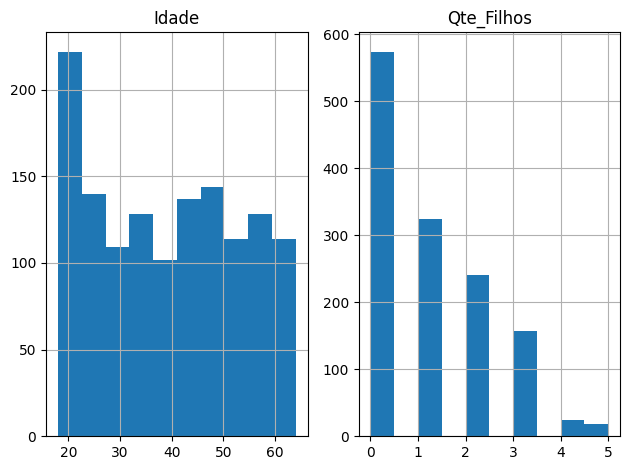

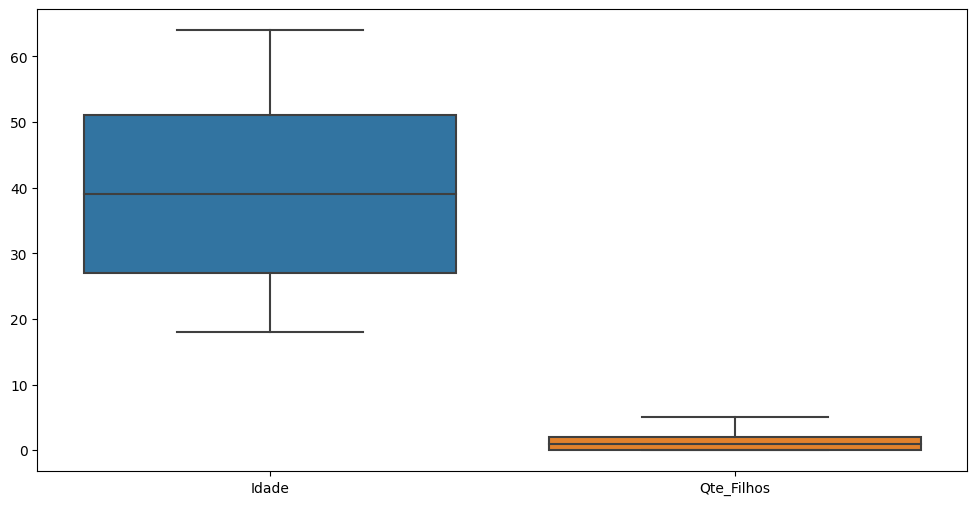

col_0     count
Região         
Centro      325
Nordeste    324
Norte       325
Sudeste     364
             Idade   Qte_Filhos
count  1338.000000  1338.000000
mean     39.207025     1.094918
std      14.049960     1.205493
min      18.000000     0.000000
25%      27.000000     0.000000
50%      39.000000     1.000000
75%      51.000000     2.000000
max      64.000000     5.000000


In [2]:
# Histogramas
plt.figure(figsize=(12, 6))
dados.hist()
plt.tight_layout()
plt.show()

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=dados)
plt.show()

# Tabelas de Frequência
tabela_frequencia = pd.crosstab(dados['Região'], columns='count')
print(tabela_frequencia)

# Estatísticas Descritivas
descricao = dados.describe()
print(descricao)

### Distribuição por Região

A distribuição dos colaboradores por região é a seguinte:

- Centro: 325 colaboradores
- Nordeste: 324 colaboradores
- Norte: 325 colaboradores
- Sudeste: 364 colaboradores

### Estatísticas Descritivas de Idade e Quantidade de Filhos

Aqui estão algumas estatísticas descritivas das variáveis 'Idade' e 'Quantidade de Filhos':

- **Idade:**
  - Média: 39.21
  - Desvio Padrão: 14.05
  - Mínimo: 18
  - Máximo: 64

- **Quantidade de Filhos:**
  - Média: 1.09
  - Desvio Padrão: 1.21
  - Mínimo: 0
  - Máximo: 5

Essas informações nos dão uma visão geral sobre a idade e a distribuição de filhos entre os colaboradores.

---

## Correlação entre Variáveis

Aqui, exploramos as relações entre as variáveis usando a matriz de correlação e gráficos de dispersão.

- Calculamos a matriz de correlação entre as variáveis.
- Usamos um mapa de calor (heatmap) para visualizar as correlações.
- Criamos gráficos de dispersão para analisar pares de variáveis.

<ipython-input-3-2c8126061b80>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = dados.corr()


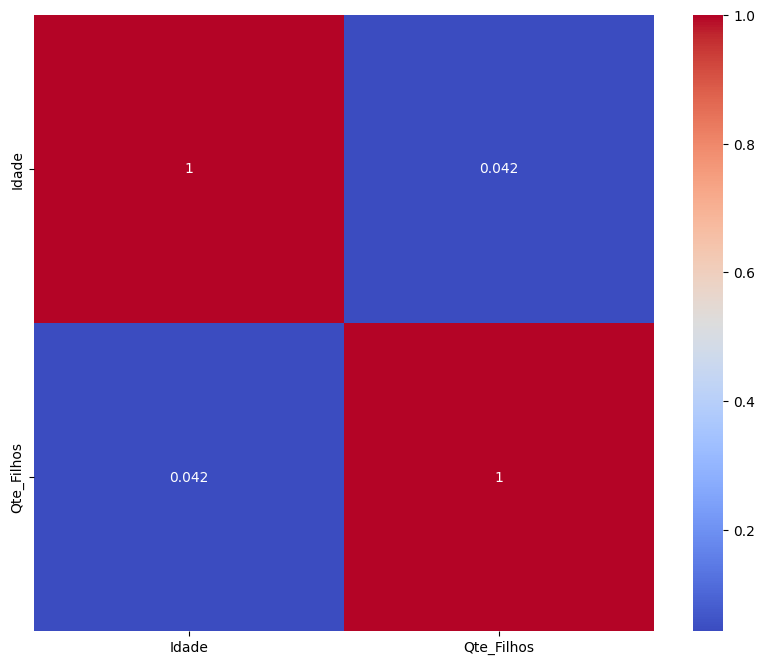

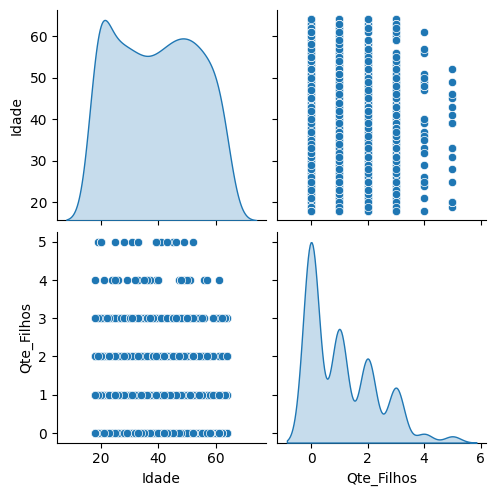

In [3]:
# Matriz de Correlação
correlacao = dados.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.show()

# Gráficos de Dispersão
sns.pairplot(dados, diag_kind='kde')
plt.show()

## Análise de Categorias de IMC

Investigamos a relação entre as categorias de Índice de Massa Corpórea (IMC) e o custo do plano de saúde.

- Criamos faixas de IMC e adicionamos essa variável categórica ao DataFrame.
- Comparação de custos por categoria de IMC usando box plots.

<ipython-input-8-8d55537c42ab>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados['Custo_Saude'] = dados['Custo_Saude'].str.replace('.', '').str.replace(',', '.').astype(float)


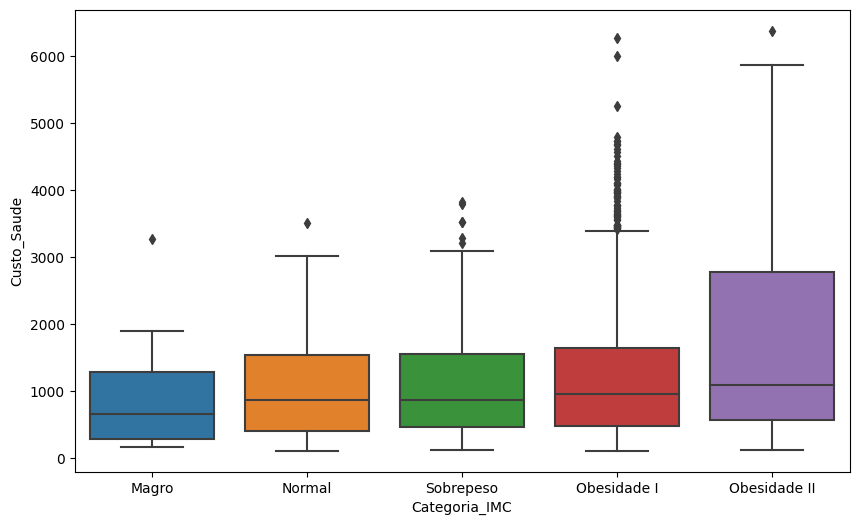

In [8]:
# Corrigir a coluna 'Custo_Saude' convertendo para valores numéricos
dados['Custo_Saude'] = dados['Custo_Saude'].str.replace('.', '').str.replace(',', '.').astype(float)

# Criação de Faixas de IMC
categorias = pd.cut(dados['IMC'], bins=[0, 18.5, 24.9, 29.9, 34.9, 100], labels=['Magro', 'Normal', 'Sobrepeso', 'Obesidade I', 'Obesidade II'])

# Adicionar a coluna de categorias ao DataFrame
dados['Categoria_IMC'] = categorias

# Comparação de Custos por Categoria de IMC
plt.figure(figsize=(10, 6))
sns.boxplot(x=dados['Categoria_IMC'], y=dados['Custo_Saude'])
plt.show()

## Análise de Variáveis Categóricas

Avaliamos o impacto das variáveis categóricas 'Região', 'Sexo' e 'Fumante' no custo do plano de saúde.

- Criamos variáveis dummy para a variável categórica 'Fumante'.
- Usamos a regressão linear múltipla para entender o efeito das variáveis independentes ('Idade', 'IMC', 'Qte_Filhos' e 'Fumante') no custo do plano de saúde.

In [10]:
# Transformar a variável categórica 'Fumante' em variáveis dummy
dados = pd.get_dummies(dados, columns=['Fumante'], drop_first=True)

# Preparar as variáveis independentes e a variável dependente
X = dados[['Idade', 'IMC', 'Qte_Filhos', 'Fumante_Sim']]
X = sm.add_constant(X)  # Adicionar a constante para a regressão
y = dados['Custo_Saude']

# Criar o modelo de regressão linear múltipla
modelo = sm.OLS(y, X).fit()

# Exibir os resultados
print(modelo.summary())



                            OLS Regression Results                            
Dep. Variable:            Custo_Saude   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.2
Date:                Wed, 09 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:55:43   Log-Likelihood:                -10470.
No. Observations:                1338   AIC:                         2.095e+04
Df Residuals:                    1333   BIC:                         2.098e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1210.5478     94.195    -12.851      

### Resultados da Regressão Linear Múltipla

A regressão linear múltipla revelou informações importantes sobre as variáveis independentes e seu impacto no custo do plano de saúde.

- O coeficiente de determinação (R-squared) indica que cerca de 75% da variação no custo do plano de saúde é explicada pelas variáveis independentes no modelo.
- Os coeficientes estimados mostram como cada variável influencia o custo do plano de saúde.
- Os P-values indicam a significância estatística das variáveis no modelo.

## Recomendações para Otimização de Custos

Com base nos resultados da análise, podemos sugerir algumas ações preventivas para a empresa reduzir os custos do plano de saúde.

- Promover programas de bem-estar e conscientização sobre os riscos do fumo e da obesidade.
- Oferecer incentivos para a adoção de hábitos saudáveis, como atividade física regular e alimentação balanceada.
- Desenvolver programas de cessação do tabagismo.
- Fornecer suporte nutricional e orientação para manter um IMC saudável.
- Realizar campanhas de conscientização sobre os benefícios de um estilo de vida saudável.